In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
city_data = pd.read_csv('city_data.csv')
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [13]:
ride_data = pd.read_csv('ride_data.csv')
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [15]:
city_ride_data = pd.merge(city_data, ride_data, on='city')
city_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [28]:
group = city_ride_data.groupby(by='city')
result = pd.DataFrame({ 'Average Fare': group.mean()['fare'], 'Number of Rides': group.size() })
result.head()

,Average Fare,Number of Rides
city,,
Amandaburgh,24.641667,18
Barajasview,25.332273,22
Barronchester,36.422500,16
Bethanyland,32.956111,18
Bradshawfurt,40.064000,10


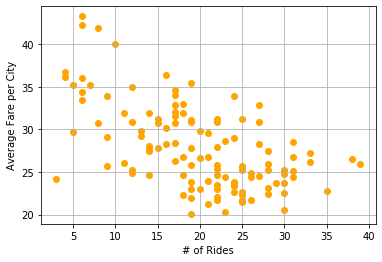

In [34]:
plt.scatter(result['Number of Rides'], result['Average Fare'], c='Orange')
plt.xlabel('# of Rides')
plt.ylabel('Average Fare per City')
plt.grid(b=True)
plt.show()

In [38]:
group_by_type = city_ride_data.groupby(by='type')
group_by_type.sum()

,driver_count,fare,ride_id
type,,,
Rural,537,4327.93,580968240341287
Suburban,8570,19356.33,3106884522576766
Urban,59602,39854.38,7919412664056093


In [59]:
group_by_type_with_city = pd.merge(result, city_data, on='city').groupby(by='type')
group_by_type_with_city.sum()

,Average Fare,Number of Rides,driver_count
type,,,
Rural,623.479771,125,78
Suburban,1106.542729,625,490
Urban,1616.942033,1625,2405


([<matplotlib.patches.Wedge at 0x7ff044ac0d30>,
 [Text(1.0849974335199486, 0.1810540506454493, 'Rural'),
  Text(0.4418649348526167, 1.0073506734735889, 'Suburban'),
  Text(-0.601642880908579, -0.9208831868657531, 'Urban')],
 [Text(0.5918167819199719, 0.09875675489751778, '5.3%'),
  Text(0.24101723719233634, 0.5494640037128666, '26.3%'),
  Text(-0.32816884413195213, -0.5022999201085925, '68.4%')])

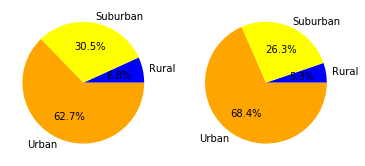

In [60]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.pie(group_by_type.sum()['fare'], colors=['blue', 'yellow', 'orange'], labels=['Rural', 'Suburban', 'Urban'], autopct='%.1f%%')
ax2.pie(group_by_type_with_city.sum()['Number of Rides'], colors=['blue', 'yellow', 'orange'], labels=['Rural', 'Suburban', 'Urban'], autopct='%.1f%%')